In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = keras.datasets.cifar10.load_data()

# Normalize the dataset
train_X, test_X = train_X / 255.0, test_X / 255.0

# One-hot encode the labels
train_Y_one_hot = keras.utils.to_categorical(train_Y, 10)
test_Y_one_hot = keras.utils.to_categorical(test_Y, 10)

# Split validation set from training data
val_X, val_Y = train_X[45000:], train_Y_one_hot[45000:]
train_X, train_Y = train_X[:45000], train_Y_one_hot[:45000]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,890 (730.04 KB)

 Trainable params: 186,890 (730.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.3481 - loss: 1.7914 - val_accuracy: 0.5312 - val_loss: 1.3243
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5562 - loss: 1.2513 - val_accuracy: 0.6208 - val_loss: 1.0971
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6211 - loss: 1.0812 - val_accuracy: 0.6014 - val_loss: 1.1239
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6553 - loss: 0.9895 - val_accuracy: 0.6596 - val_loss: 0.9721
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6808 - loss: 0.9226 - val_accuracy: 0.6734 - val_loss: 0.9446
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7004 - loss: 0.8544 - val_accuracy: 0.6852 - val_loss: 0.9195
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7105 - loss: 0.8207 - val_accuracy: 0.6892 - val_loss: 0.8954
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7294 - loss: 0.7729 - val_accuracy: 

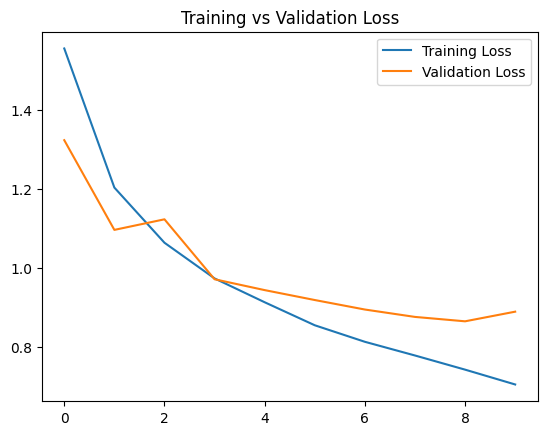

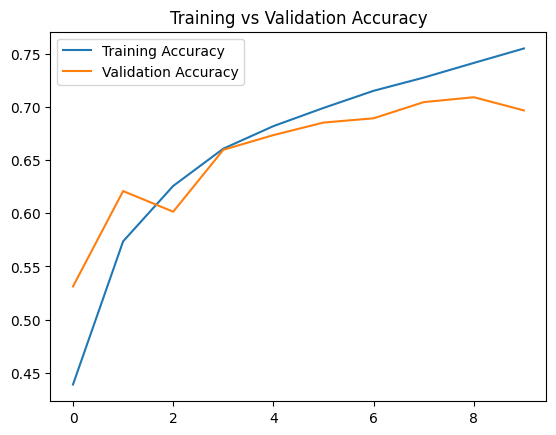

In [ ]:
# Train the model
history = model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(val_X, val_Y))

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
# Evaluate model on test data
score = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f'\nTest Accuracy: {score[1]:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6851 - loss: 0.9194

Test Accuracy: 0.6821


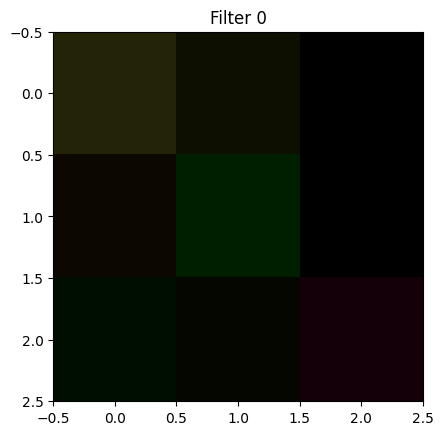

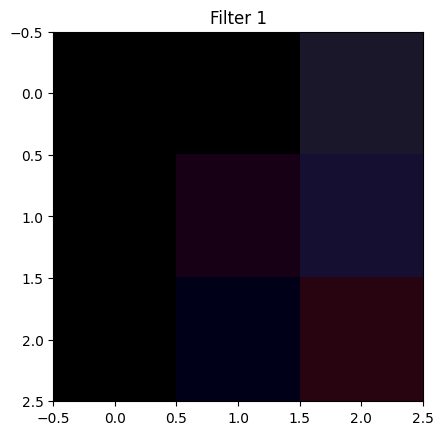

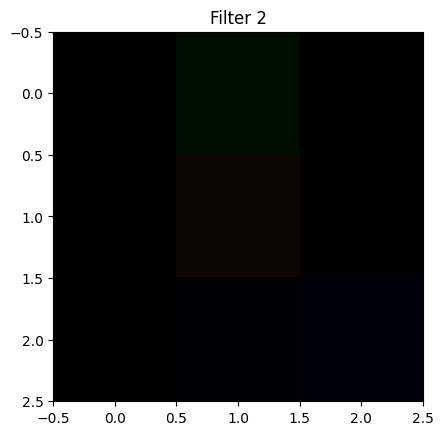

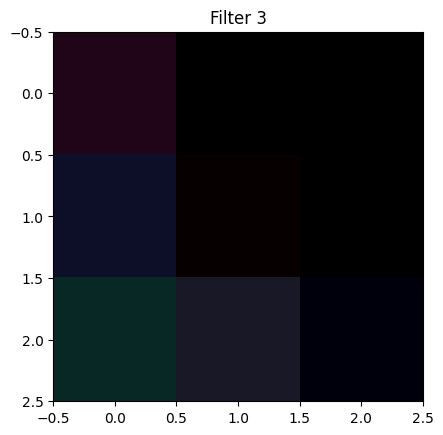

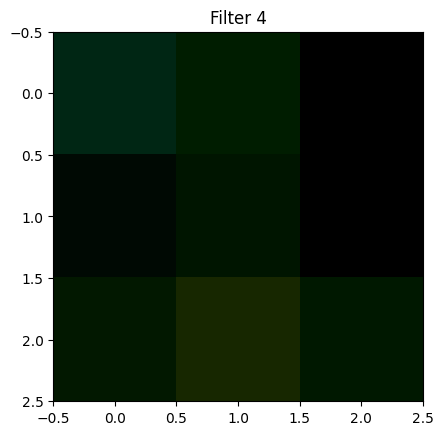

In [ ]:
# Get filters from the first layer
filters, biases = model.layers[0].get_weights()

# Plot first 5 filters
for i in range(5):
    plt.imshow(filters[:, :, :, i], cmap='gray')
    plt.title(f'Filter {i}')
    plt.show()


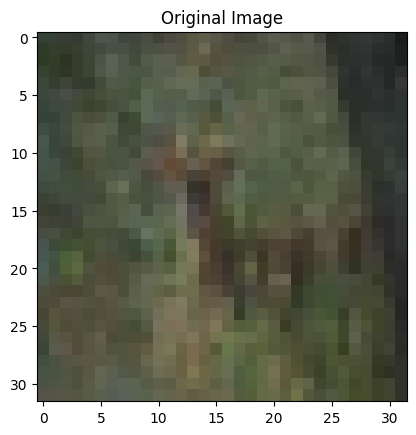

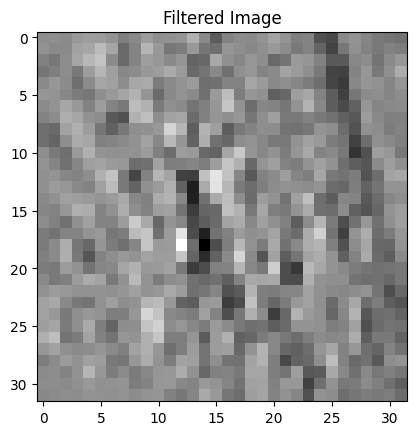

In [ ]:
from scipy import signal

# Select an image
im = train_X[10]
plt.imshow(im)
plt.title("Original Image")
plt.show()

# Convert image to grayscale for filtering
im_gray = np.dot(im[..., :3], [0.2989, 0.5870, 0.1140])

# Apply the filter
filtered_image = signal.convolve2d(im_gray, filters[:, :, 0, 0], boundary='symm', mode='same')

# Show the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.show()


In [ ]:
# Define a fully connected dense model
fc_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
fc_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the dense network
fc_history = fc_model.fit(train_X, train_Y, epochs=10, batch_size=64, validation_data=(val_X, val_Y))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1903 - loss: 2.2156 - val_accuracy: 0.2978 - val_loss: 1.9403
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2482 - loss: 1.9966 - val_accuracy: 0.2976 - val_loss: 1.9189
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2656 - loss: 1.9687 - val_accuracy: 0.3062 - val_loss: 1.9304
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2693 - loss: 1.9389 - val_accuracy: 0.3216 - val_loss: 1.9323
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2752 - loss: 1.9354 - val_accuracy: 0.3036 - val_loss: 1.9531
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2686 - loss: 1.9477 - val_accuracy: 0.3090 - val_loss: 1.9309
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2836 - loss: 1.9246 - val_accuracy: 0.3346 - val_loss: 1.9178
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2896 - loss: 1.9208 - val_accuracy: 0.

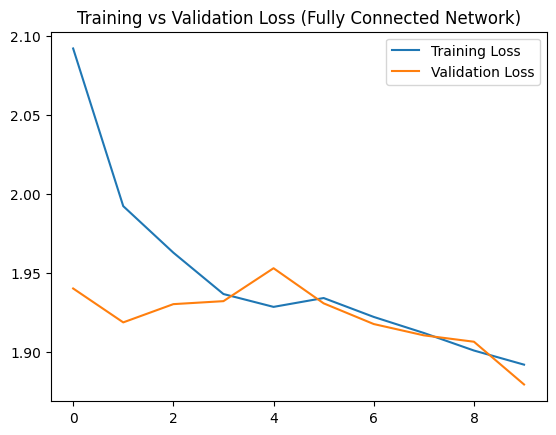

In [ ]:
# Plot training & validation loss
plt.plot(fc_history.history['loss'], label='Training Loss')
plt.plot(fc_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss (Fully Connected Network)")
plt.show()


In [ ]:
# Evaluate the fully connected model on test data
fc_score = fc_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f'\nTest Accuracy (Fully Connected Network): {fc_score[1]:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3545 - loss: 1.8659

Test Accuracy (Fully Connected Network): 0.3501


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a custom CNN model
def create_custom_cnn(input_shape=(128, 128, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Regularization
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example model creation
cnn_model = create_custom_cnn()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,722 (49.36 MB)

 Trainable params: 12,939,722 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model

# Pass a dummy input to build the model
dummy_input = tf.random.normal((1, 128, 128, 3))  # Adjust shape based on your dataset
_ = cnn_model(dummy_input)  # This ensures the model is initialized

# Now, extract feature maps
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)



# Convert images into feature vectors
X_features = feature_extractor.predict(X_train)

# Train a classifier using the extracted features
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_features, y_train, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_feat, y_train_feat)

# Evaluate the classifier
accuracy = clf.score(X_test_feat, y_test_feat)
print(f"Classification Accuracy: {accuracy:.4f}")


AttributeError: The layer sequential_2 has never been called and thus has no defined input.

In [ ]:
# Experimenting with L2 Regularization and Batch Normalization
def create_regularized_cnn(input_shape=(128, 128, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Train and compare performance with and without regularization
cnn_regularized = create_regularized_cnn()
cnn_regularized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_regularized.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,940,618 (49.36 MB)

 Trainable params: 12,940,170 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from scipy.linalg import sqrtm
import numpy as np

# Function to calculate Frechet Inception Distance (FID) for generative models
def calculate_fid(real_images, generated_images):
    # Compute mean and covariance of real and generated images
    mu_real, sigma_real = np.mean(real_images, axis=0), np.cov(real_images, rowvar=False)
    mu_gen, sigma_gen = np.mean(generated_images, axis=0), np.cov(generated_images, rowvar=False)

    # Compute square root of covariance product
    cov_sqrt = sqrtm(sigma_real.dot(sigma_gen))

    # Compute FID score
    fid_score = np.sum((mu_real - mu_gen) ** 2) + np.trace(sigma_real + sigma_gen - 2 * cov_sqrt)
    return fid_score

# Example usage:
fid = calculate_fid(real_images_sample, generated_images_sample)
print(f"FID Score: {fid:.4f}")


NameError: name 'real_images_sample' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Define Model with Regularization
def create_regularized_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),  # 50% dropout
        Dense(num_classes, activation='softmax')
    ])
    return model

# Initialize model
input_shape = (128, 128, 3)  # Adjust based on your dataset
num_classes = 10  # Adjust based on number of classes
cnn_model = create_regularized_cnn(input_shape, num_classes)

# Compile Model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print Model Summary
cnn_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,519,498 (24.87 MB)

 Trainable params: 6,519,050 (24.87 MB)

 Non-trainable params: 448 (1.75 KB)